![image](./images/House2.jpg)

# Business Understanding

Picket Partners Realty are new kids in the real estate industry. They want to sell their houses at competitive prices and they understand very well that only doing analysis won't help in this but buy come up with the best model that will help predict the house prices. We've been tasked to come up with this model using the existing Kings County data. We will use regression modeling to analyze house prices.


### Data Understanding

### Loading and previewing the Data

#### import the modules needed

Let's import all the modules that we will need to handle this project.

In [323]:
#load necessary modules 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

We need to load our dataset so that we can review it. This will help us understand what we are dealing with and figure out how to proceeed with the project

In [324]:
#Load our data
df = pd.read_csv('./data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [325]:
df.shape

(21597, 21)

In [327]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


The Kings County data has 21597 rows and 21 columns. 


#### Column Names and descriptions for Kings County Data Set

##### Depend variable

 pricePrice -  is prediction target

##### Independent variables

 id - unique identified for a house

 dateDate - house was sold

 bedroomsNumber -  of Bedrooms/House

 bathroomsNumber -  of bathrooms/bedrooms

 sqft_livingsquare -  footage of the home

 sqft_lotsquare -  footage of the lot

 floorsTotal -  floors (levels) in house

 waterfront - House which has a view to a waterfront

 view - Has been viewed

 condition - How good the condition is ( Overall )

 grade - overall grade given to the housing unit, based on King County grading system

 sqft_above - square footage of house apart from basement

 sqft_basement - square footage of the basement

 yr_built - Built Year

 yr_renovated - Year when house was renovated

 zipcode - zip

 lat - Latitude coordinate

 long - Longitude coordinate

 sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

 sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Let's review what columns we have in our data.

We need to know the data type in each column and all the information of the  data

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We have 20 columns and most columns have more than 21000 rows. 

Waterfront, yr_renovated and view columns have missing values.

### Scrubbing and Cleaning Data

##### NULL VALUES

In [329]:
#Check for null values
df.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [330]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The yr_renovated column has a total of 3842 missing values which makes a big portion of the total values in the column.
However, we will use this column to come up with an additional column that will help us investigate it's effects on prices.
In the waterfront, the null values shall be replaced with a 0 and for the view column, the null values, we will replace them with the median of the column.

In [331]:
df['waterfront'].fillna(0, inplace=True)

In [332]:
#check for the remaining null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [333]:
#Check for median and mean for the view column
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [334]:
#check the unique values in view to help us the data in the view column 
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [335]:
#fill the null values with 0
df['view'].fillna(0, inplace=True)

In [336]:
#fill the null values with 0
df['yr_renovated'].fillna(0, inplace=True)

In [337]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#####  Check for duplicates

In [338]:
# check if the number of duplicates is 0
df.duplicated(subset = ["id", "date"]).sum() == 0

True

We are good to go as we don't have any duplicates.

### convert our data to desirable data types

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [340]:
#check why the datatype in the sqft_basement is  an object
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
666.0         1
1990.0        1
2490.0        1
1880.0        1
556.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [341]:
#Having identified the ?, we replace it with 0
df['sqft_basement'].replace({"?": 0}, inplace=True)

In [342]:
#convert the sqft_basement column to float
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [343]:
#convert the date datatype to datetime
df['date'] = pd.to_datetime(df['date'])

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

#### Creating new columns

In [345]:
#creating new columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [346]:
df['basement_present'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['basement_present'] = df['basement_present'].astype('category')

df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['renovated'] = df['renovated'].astype('category')

In [347]:
df['house_age'] = df['year'] - df['yr_built']

In [348]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'basement_present', 'renovated', 'house_age'],
      dtype='object')

In [349]:
#drop some of the columns that we don't need after creating some new ones 
col_drop = ["id", "date", "yr_built", "long",'day','year','yr_renovated', "sqft_basement" ]

def col_droppp(data, columnss):
    df = data.drop(columnss, axis = 1)
    return df
df = col_droppp(df, col_drop)

In [350]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,sqft_living15,sqft_lot15,month,basement_present,renovated,house_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,98178,47.5112,1340,5650,10,0,0,59
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,98125,47.7210,1690,7639,12,1,1,63
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,98028,47.7379,2720,8062,2,0,0,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,98136,47.5208,1360,5000,12,1,0,49
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,98074,47.6168,1800,7503,2,0,0,28


## Data Preprocessing

### Checking For Multicollinearity

We check for multicollinearity and correlation between columns. We will proceed with those columns that have a high correlation with the price. 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,sqft_living15,sqft_lot15,month,house_age
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053402,0.306692,0.585241,0.082845,0.009928,0.053890
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.002127,0.078354,0.026496,0.356563,0.479386,0.154092,0.009951,0.393406,0.030690,0.001046,0.155817
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.126479,0.665838,0.686668,0.204786,0.024280,0.569884,0.088303,0.007543,0.507561
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.059445,0.762779,0.876448,0.199802,0.052155,0.756402,0.184342,0.012112,0.318592
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,0.004814,0.021459,0.075054,0.008830,0.114731,0.184139,0.129586,0.085514,0.144763,0.718204,0.002591,0.052853
floors,0.256804,0.177944,0.502582,0.353953,0.004814,1.000000,0.020797,0.028414,0.264075,0.458794,0.523989,0.059541,0.049239,0.280102,0.010722,0.014245,0.489514
waterfront,0.264306,0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.028923,0.012157,0.083823,0.030658,0.008199,0.024406
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.085059,0.006321,0.278928,0.073083,0.005161,0.054467
condition,0.036056,0.026496,0.126479,0.059445,0.008830,0.264075,0.016648,0.045622,1.000000,0.146896,0.158904,0.002888,0.015102,0.093072,0.003126,0.022388,0.360836
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,0.146896,1.000000,0.756073,0.185771,0.113575,0.713867,0.120981,0.008989,0.448322


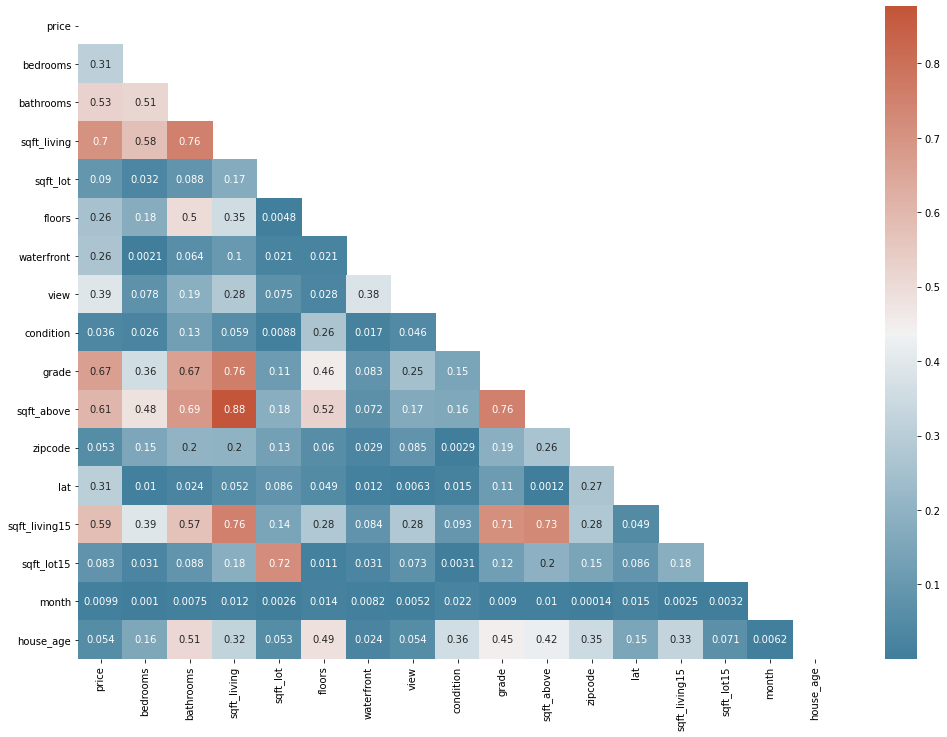

In [351]:
# Compute the correlation matrix
corrn = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrn, dtype=bool))

# Set up the matplotlib figure
fig, ax=plt.subplots(figsize=(17,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corrn, mask = mask, cmap=cmap, annot=True)
plt.savefig('./images/heatmap.png')
corrn

In [353]:
#Check the columns correlation with our target column, price
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
month           -0.009928
zipcode         -0.053402
house_age       -0.053890
Name: price, dtype: float64

In [354]:
#Check for features that have a correlation of more than 0.7
mc_features = []
mc_corrn = []
def check_multicollinearity(feature):
    for index, correlation in corrn[feature].T.iteritems():
        if correlation >= 0.8 and index != feature:
            mc_features.append([feature, index])
            mc_corrn.append(correlation)
            
for feature in corrn:
    check_multicollinearity(feature)
df_m = pd.DataFrame({'Correlations':mc_corrn, 'Features': mc_features}).sort_values(by=['Correlations'], ascending=False)
df_m

,Correlations,Features
0,0.876448,"[sqft_living, sqft_above]"
1,0.876448,"[sqft_above, sqft_living]"


From our analysis of multicollinearity, we've been able to display that sqft_living and sqft_above have correlations above 0.8. So it's only prudent that we drop one of these columns. We shall drop sqft_above.
id column has also a negative correlation with price, we will also drop this column.

In conclusion, sqft_living column has proved to be having the highest correlation with price, so we shall proceed having this in mind.

In [355]:
#ropping the sqft_above column
col_drop = ['sqft_above']
df = col_droppp(df, col_drop)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,sqft_living15,sqft_lot15,month,basement_present,renovated,house_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,98178,47.5112,1340,5650,10,0,0,59
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,1690,7639,12,1,1,63
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,2720,8062,2,0,0,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,1360,5000,12,1,0,49
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,1800,7503,2,0,0,28


In [356]:
corrn.index.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'zipcode', 'lat', 'sqft_living15', 'sqft_lot15', 'month',
       'house_age'], dtype=object)

In [357]:
# function to help us get features that have a correlation of a given thresshold
def getcorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate (corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df_1 = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df_1

In [358]:
# checkiing for features that have correlations above 20%
corrdata = df
threshold = 0.50
corr_value = getcorrelatedFeature(corrn['price'], threshold)
corr_value

,Corr Value
price,1.000000
bathrooms,0.525906
sqft_living,0.701917
grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241


In [359]:
corr_df = corrn[corr_value.index]
corr_df.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
price,1.000000,0.525906,0.701917,0.667951,0.605368,0.585241
bedrooms,0.308787,0.514508,0.578212,0.356563,0.479386,0.393406
bathrooms,0.525906,1.000000,0.755758,0.665838,0.686668,0.569884
sqft_living,0.701917,0.755758,1.000000,0.762779,0.876448,0.756402
sqft_lot,0.089876,0.088373,0.173453,0.114731,0.184139,0.144763


Let's drop the features that have a correlation with price of less 50%. However we won't drop zipcode, lat, waterfront and bedrooms as after fitting, we will see that we get better results than when we don't include them.

In [360]:
#Dropping the columns that have a correlation of less than 50%
col_drop = ['sqft_lot', 'floors', 'view', 'sqft_lot15', 'condition','month', 'basement_present', 'renovated', 'house_age']
df = col_droppp(df, col_drop)
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,zipcode,lat,sqft_living15
0,221900.0,3,1.00,1180,0.0,7,98178,47.5112,1340
1,538000.0,3,2.25,2570,0.0,7,98125,47.7210,1690
2,180000.0,2,1.00,770,0.0,6,98028,47.7379,2720
3,604000.0,4,3.00,1960,0.0,7,98136,47.5208,1360
4,510000.0,3,2.00,1680,0.0,8,98074,47.6168,1800


In [361]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
zipcode         -0.053402
Name: price, dtype: float64

Here we notice that apart from view and grade that are categorical, other features are contiuous 

### Checking and dealing with outliers in our target

Let's check for outliers using boxplots

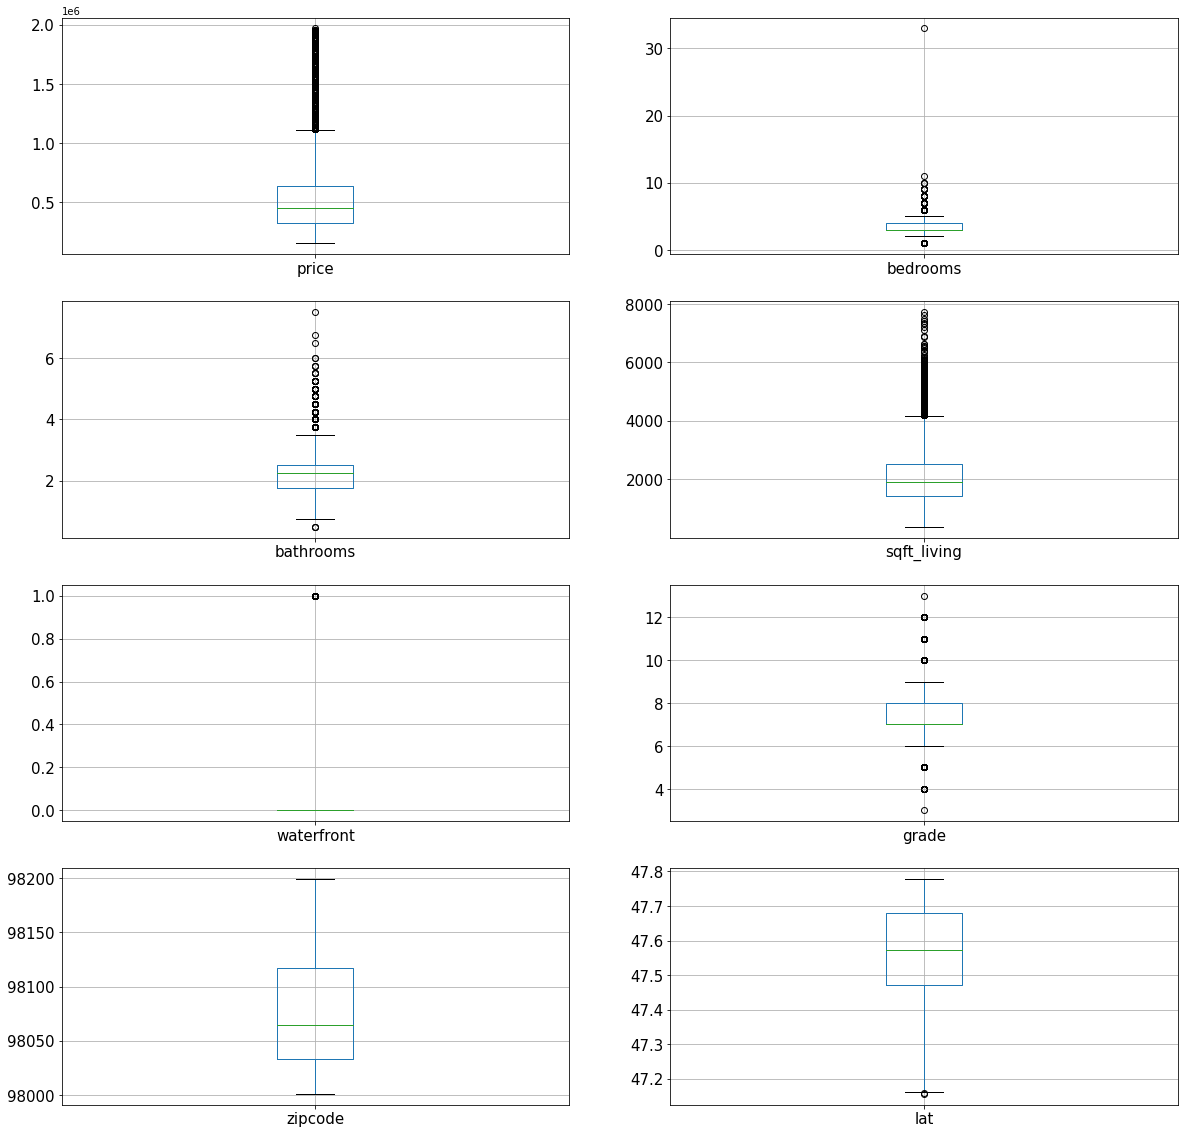

In [459]:
# only visualising boxplots of non-string variables
df_cols = df.columns

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,20))
# counter
index = 0
for row in range(len(axes)):
    for col in range(len(axes[row])):
        if index == len(df_cols):
            break
        ax = axes[row][col]
        var = df[[df_cols[index]]]
        var.boxplot(fontsize = 15, ax = ax)
        index += 1
plt.savefig("./images/boxplots.png", dpi = 150, bbox_inches = "tight")

Most features have a lot of outliers. However we will deal with price outliers and the remaining ones, we will deal with them by log transforming our data.

In [363]:
df['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

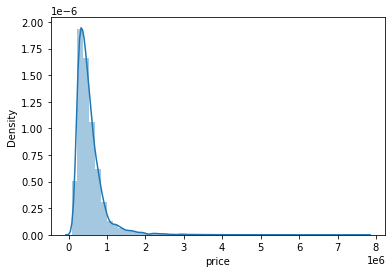

In [364]:
#Checking fot the availability of outliers
sns.distplot(df['price'])

Let's investigate the outliers that are visible in our plot above

In [365]:
df['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [366]:
for q in np.linspace(.0, 1, num=100):
    qnt = round(df['price'].quantile(q=q), 2)
    print(f'{round(q,2)}th percentile:\tset. {qnt}')

0.0th percentile:	set. 78000.0
0.01th percentile:	set. 154563.64
0.02th percentile:	set. 175576.15
0.03th percentile:	set. 192690.91
0.04th percentile:	set. 203000.0
0.05th percentile:	set. 210676.77
0.06th percentile:	set. 220000.0
0.07th percentile:	set. 227000.0
0.08th percentile:	set. 234953.28
0.09th percentile:	set. 240000.0
0.1th percentile:	set. 246000.0
0.11th percentile:	set. 250000.0
0.12th percentile:	set. 255530.67
0.13th percentile:	set. 261000.0
0.14th percentile:	set. 267500.0
0.15th percentile:	set. 272000.0
0.16th percentile:	set. 277000.0
0.17th percentile:	set. 280500.0
0.18th percentile:	set. 287500.0
0.19th percentile:	set. 292500.0
0.2th percentile:	set. 299000.0
0.21th percentile:	set. 302000.0
0.22th percentile:	set. 308000.0
0.23th percentile:	set. 313500.0
0.24th percentile:	set. 319000.0
0.25th percentile:	set. 324632.23
0.26th percentile:	set. 327537.22
0.27th percentile:	set. 332000.0
0.28th percentile:	set. 337000.0
0.29th percentile:	set. 342000.0
0.3th 

This analysis has clearly shown that there's a big difference between the 0th and 1th percentile and the 99th and 100th percentile. So it's only prudent to drop the last 1% of the of our data from both ends.

In [367]:
#Calculating 1% of the data
len(df)*0.01

215.97

In [368]:
df.shape

(21597, 9)

In [369]:
#We will drop 215 rows
df = df.sort_values(['price'], ascending=False).iloc[216:21383]

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21167 entries, 6329 to 3272
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21167 non-null  float64
 1   bedrooms       21167 non-null  int64  
 2   bathrooms      21167 non-null  float64
 3   sqft_living    21167 non-null  int64  
 4   waterfront     21167 non-null  float64
 5   grade          21167 non-null  int64  
 6   zipcode        21167 non-null  int64  
 7   lat            21167 non-null  float64
 8   sqft_living15  21167 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


We've now remained with 21167 rows that we will work with.

<AxesSubplot:xlabel='price', ylabel='Density'>

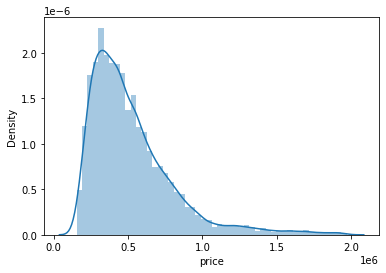

In [371]:
#Checkinng if the outliers are gone.
sns.distplot(df['price'])

### Data exploration

Check the data distributions

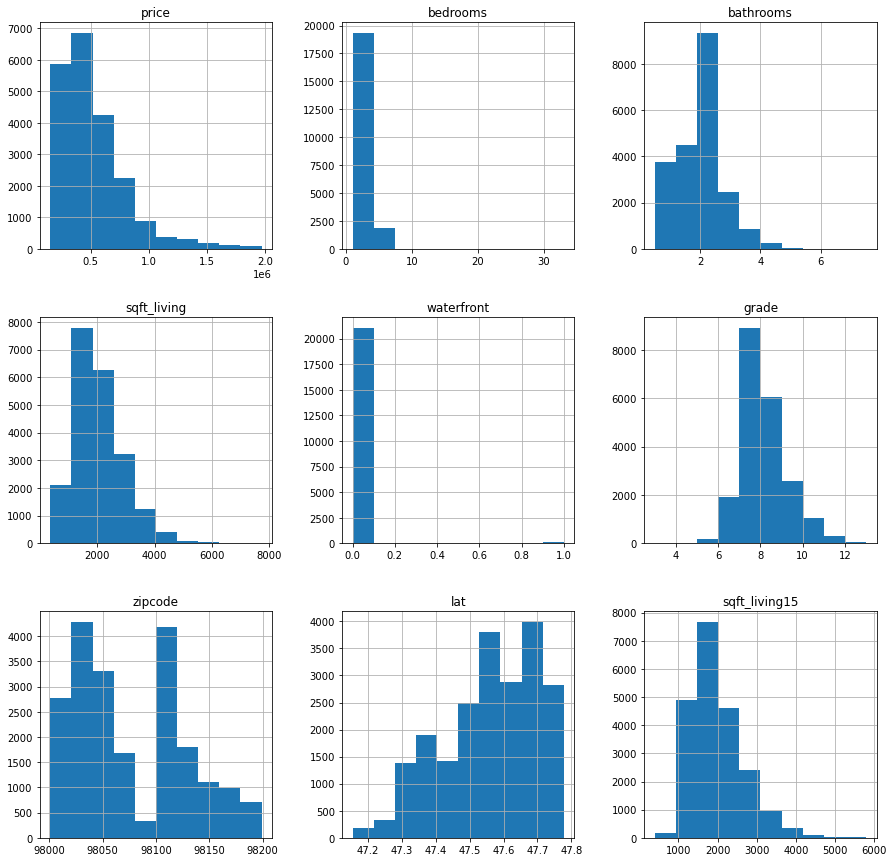

In [372]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure (figsize = (15, 15))
ax = fig.gca()
df.hist(ax = ax)
plt.savefig('./images/variable_histogram.png')

 - Houses with less than 5 bedrooms are on demand.
 - Buyers prefer houses with two bathrooms.
 - The prefered grade is 8

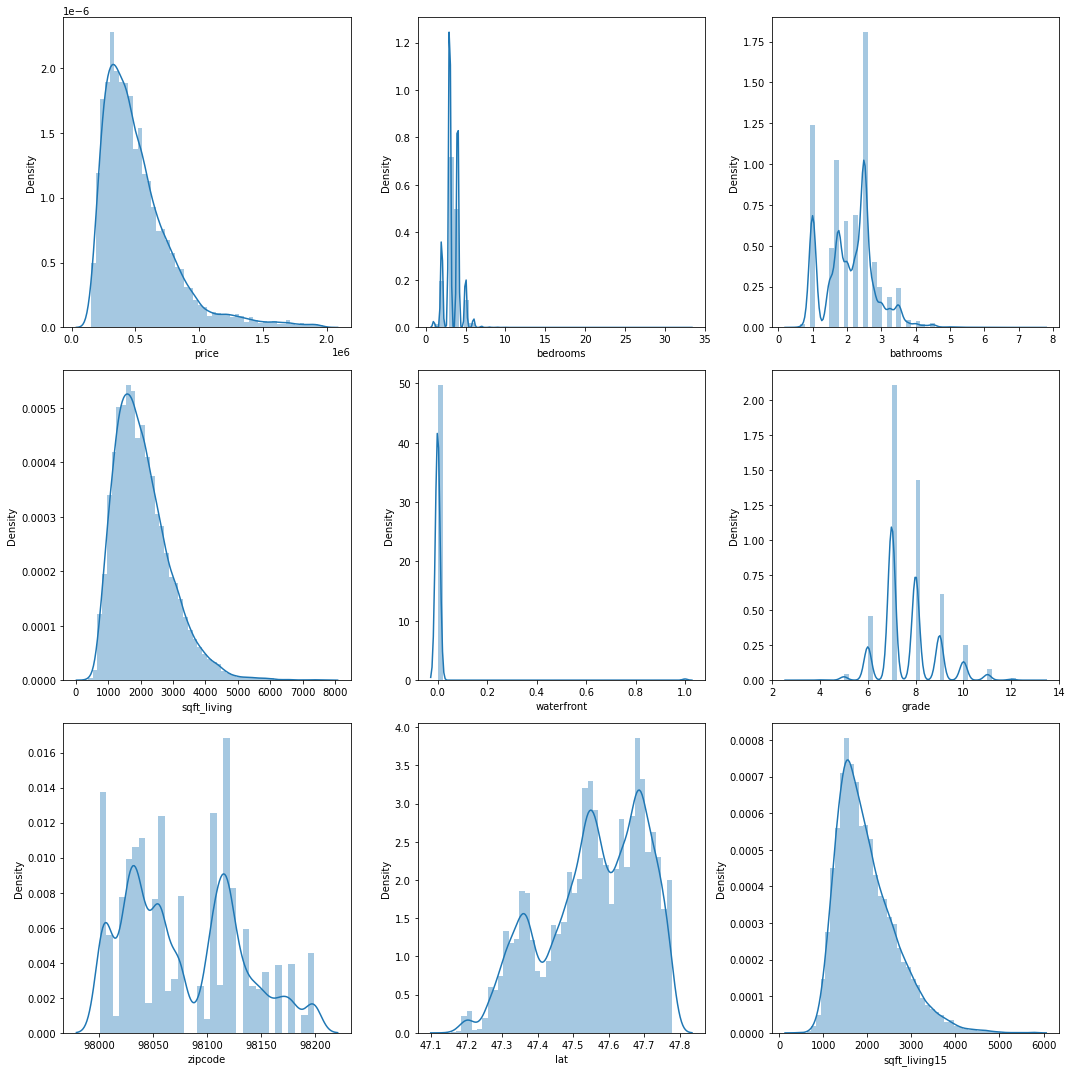

In [373]:
rows = 3
cols = 3

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (15,15))
col = df.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()
plt.savefig('./images/variable_distplot.png')

In [374]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,zipcode,lat,sqft_living15
count,2.116700e+04,21167.000000,21167.000000,21167.000000,21167.000000,21167.000000,21167.000000,21167.000000,21167.000000
mean,5.223085e+05,3.372939,2.109109,2061.974394,0.004772,7.644541,98077.934001,47.560710,1978.627581
std,2.836499e+05,0.916685,0.741734,858.127978,0.068913,1.122757,53.300213,0.138809,666.949160
min,1.535030e+05,1.000000,0.500000,370.000000,0.000000,3.000000,98001.000000,47.155900,399.000000
25%,3.250000e+05,3.000000,1.750000,1430.000000,0.000000,7.000000,98033.000000,47.471150,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,0.000000,7.000000,98065.000000,47.572300,1840.000000
75%,6.390000e+05,4.000000,2.500000,2530.000000,0.000000,8.000000,98117.000000,47.678900,2350.000000
max,1.970000e+06,33.000000,7.500000,7730.000000,1.000000,13.000000,98199.000000,47.777600,5790.000000


As shown above, the mean price of the houses is 5.223085e+05, the prefered number of bedrooms is 3 and bathrooms is 2

In [375]:
df.shape

(21167, 9)

<AxesSubplot:>

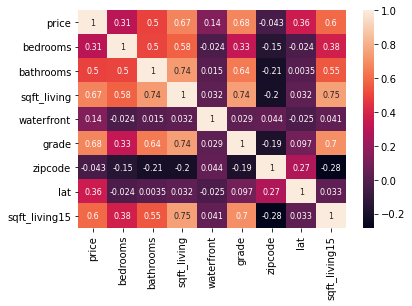

In [376]:
sns.heatmap(df.corr(), annot = True, annot_kws = {'size': 8})

Let's deal with the extreem values before we save the data that we will use later during modelling

In [377]:
# reason for this will be seen later
df_T = df.copy()
# new variable names
log_vars = [ "log_sqft_living", "log_sqft_living15"]
# log-transforming chosen variables
df_T[log_vars] = np.log(df_T[[ "sqft_living", "sqft_living15"]])
# dropping un-transformed variables
df_T.drop(["sqft_living", "sqft_living15"], axis = 1, inplace = True)
df_T.head()

,price,bedrooms,bathrooms,waterfront,grade,zipcode,lat,log_sqft_living,log_sqft_living15
6329,1970000.0,4,3.50,0.0,10,98004,47.5876,8.382518,7.992945
12271,1960000.0,5,4.50,0.0,11,98040,47.5632,8.732305,8.216088
9166,1960000.0,3,1.75,1.0,8,98040,47.5287,8.110728,8.224164
12565,1960000.0,4,4.00,0.0,12,98005,47.6422,8.396155,8.268732
1150,1960000.0,4,2.75,1.0,8,98034,47.7165,8.045588,7.874739


array([[<AxesSubplot:title={'center':'log_sqft_living'}>,
        <AxesSubplot:title={'center':'log_sqft_living15'}>]], dtype=object)

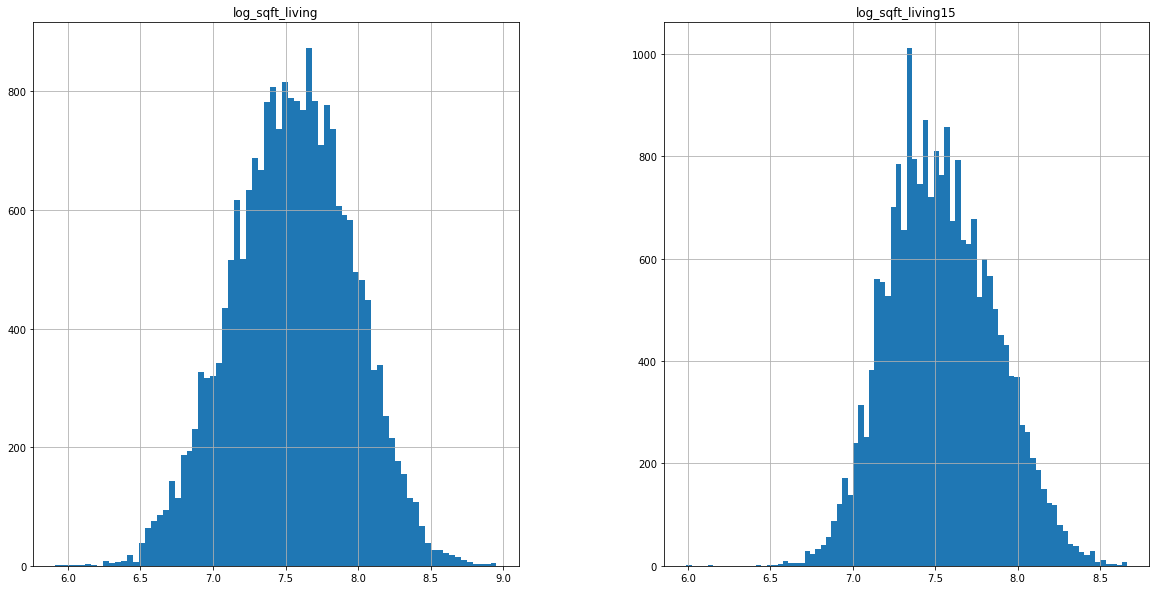

In [378]:
#Check if the features have been normalized.
df_T[log_vars].hist(bins = "auto", figsize = (20,10))

The two features have been normalized.

In [379]:
# save data frame to be used in the modeling phase
df_T.to_csv("data/P1_df_transformed.csv", index = False)

In [380]:
df_T.head()

,price,bedrooms,bathrooms,waterfront,grade,zipcode,lat,log_sqft_living,log_sqft_living15
6329,1970000.0,4,3.50,0.0,10,98004,47.5876,8.382518,7.992945
12271,1960000.0,5,4.50,0.0,11,98040,47.5632,8.732305,8.216088
9166,1960000.0,3,1.75,1.0,8,98040,47.5287,8.110728,8.224164
12565,1960000.0,4,4.00,0.0,12,98005,47.6422,8.396155,8.268732
1150,1960000.0,4,2.75,1.0,8,98034,47.7165,8.045588,7.874739


In [381]:
Y = df_T['price']
X = df_T.drop('price', axis = 1)

In [382]:
Y.shape, X.shape

((21167,), (21167, 8))

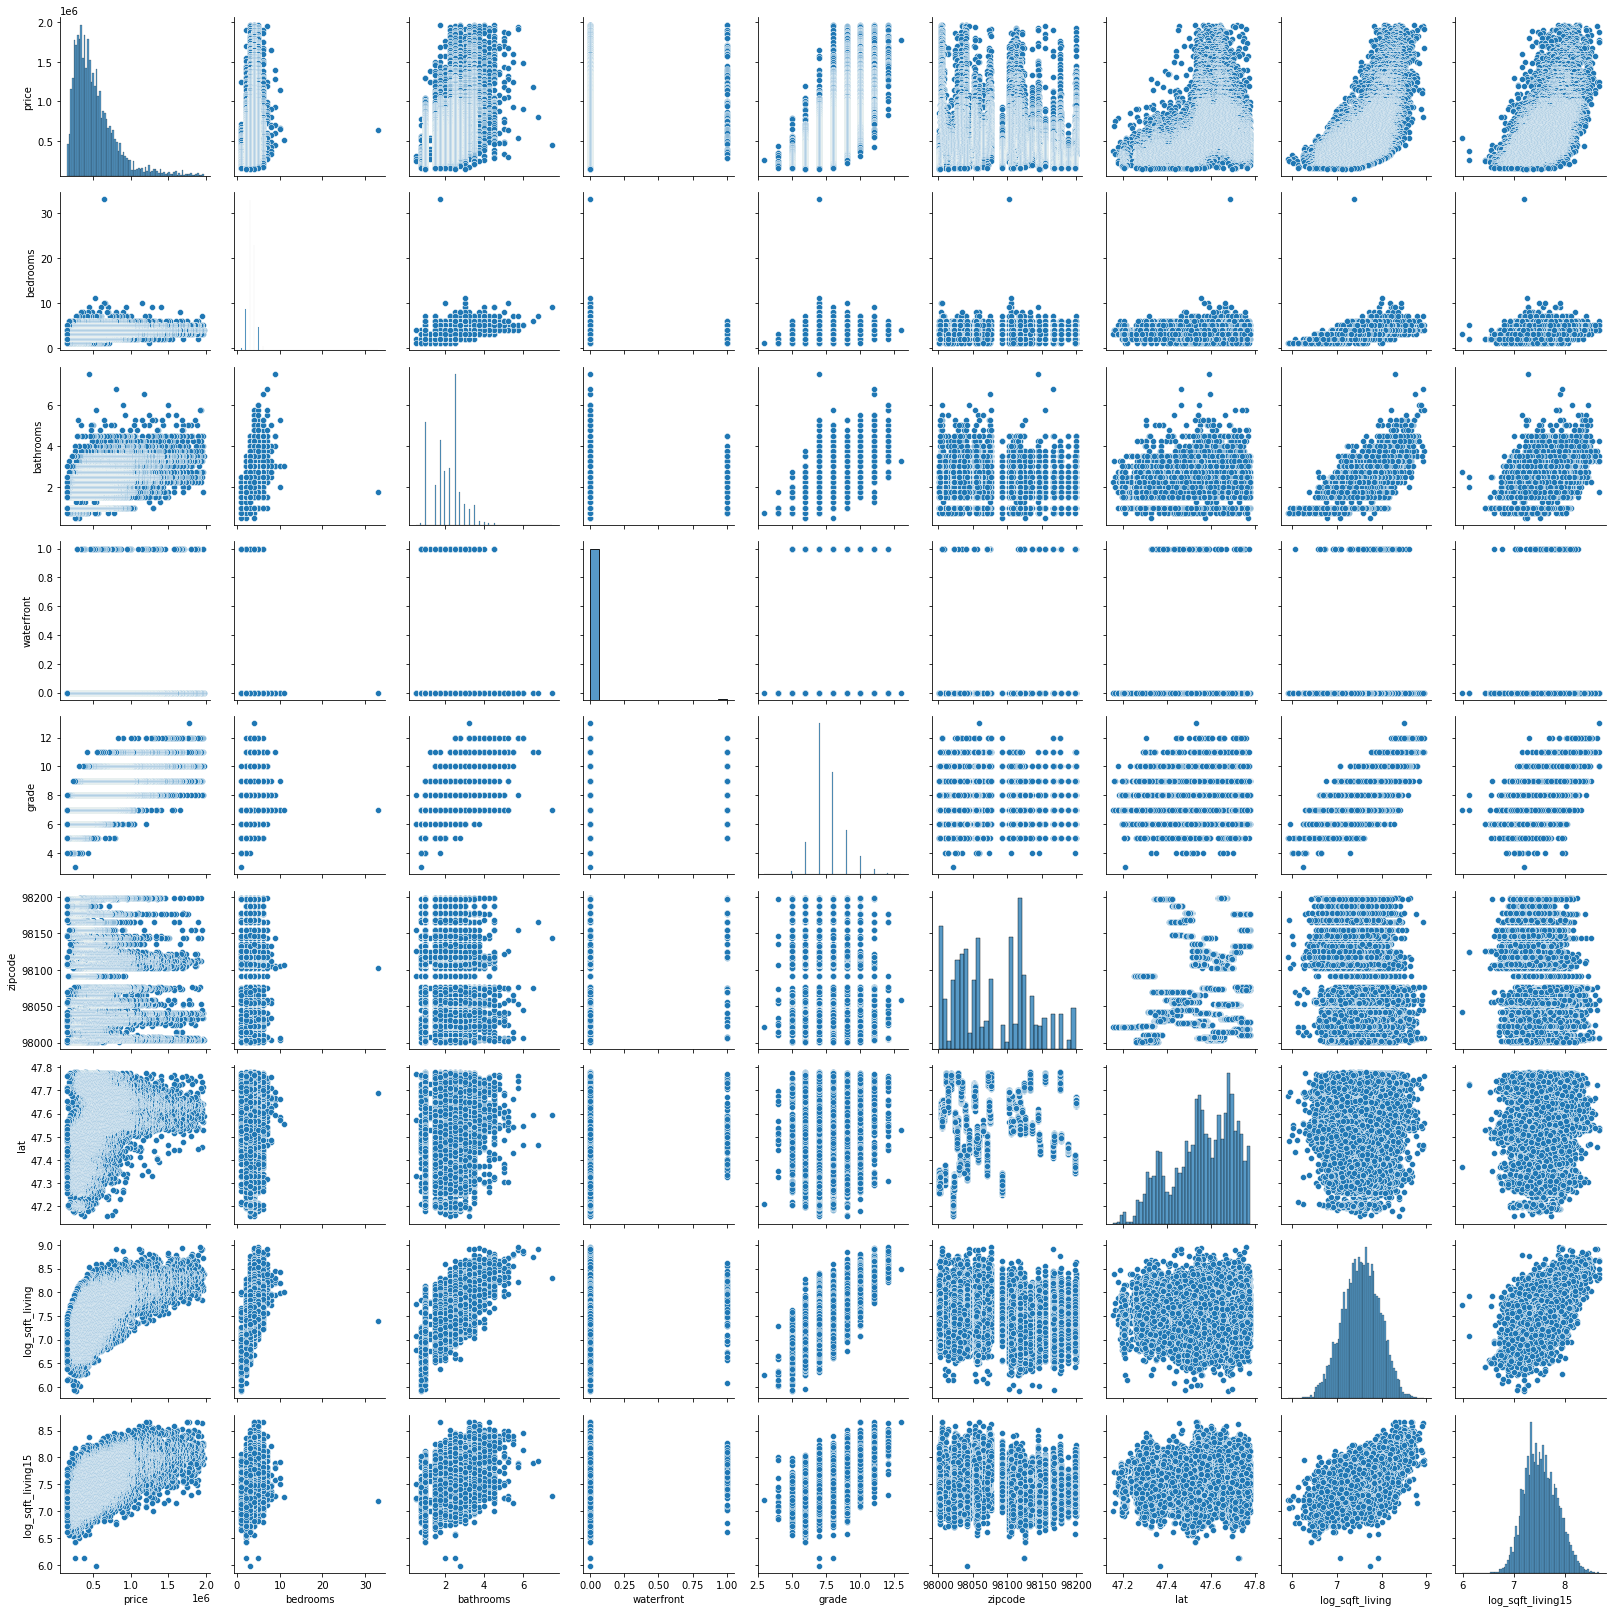

In [383]:
#plot a pairplot and corrmat for the related features
sns.pairplot(df_T)
plt.tight_layout()
plt.savefig('./images/pairplot_and_corrmat.png')

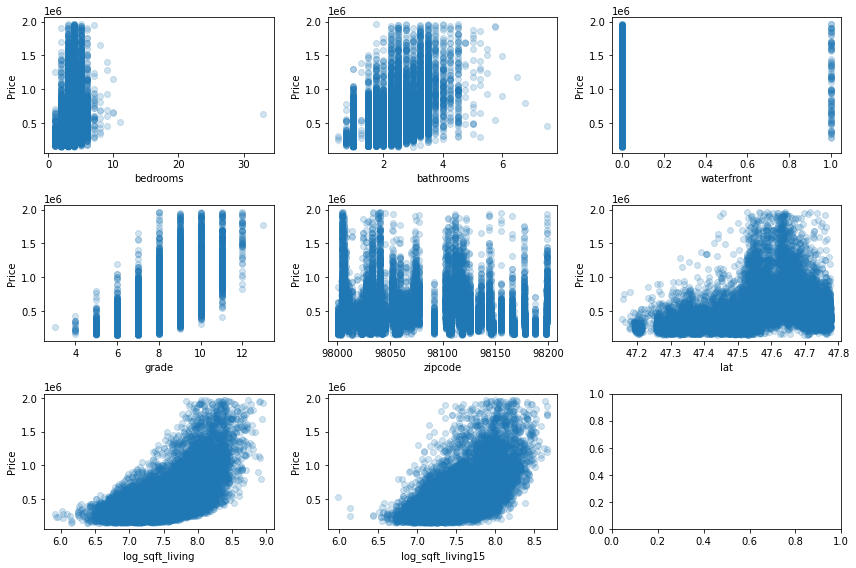

In [458]:
scatterplot_data = X

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X[col], Y, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("Price")
plt.savefig('./images/feature_scatterplot.png')

In [448]:
df_T.corr()["price"]

price                1.000000
bedrooms             0.306297
bathrooms            0.498228
waterfront           0.142265
grade                0.675629
zipcode             -0.042616
lat                  0.358319
log_sqft_living      0.622185
log_sqft_living15    0.566346
Name: price, dtype: float64

In [385]:
Y.describe()

count    2.116700e+04
mean     5.223085e+05
std      2.836499e+05
min      1.535030e+05
25%      3.250000e+05
50%      4.500000e+05
75%      6.390000e+05
max      1.970000e+06
Name: price, dtype: float64

# Data Modeling

#### Splitting the data to test and train data

In [386]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)
X_train.shape, X_test.shape

((16933, 8), (4234, 8))

### Building a Baseline Model

Now, we'll build a linear regression model using the most correlated feature, which will serve as our baseline model:


In [387]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

Then we evaluate the model using cross_validate and ShuffleSplit, which essentially means that we perform 3 separate train-test splits within our X_train and y_train, then we find both the train and the test scores for each

In [451]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
most_correlated_feature = "grade"
baseline_scores = cross_validate(
    estimator=baseline_model,
    X = X_train[[most_correlated_feature]],
    y = Y_train,
    return_train_score = True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.46115452851186917
Validation score: 0.4663619573348055


This model has a variance of 46.11% and 46.63% in the training and validation respectively.It is therefore getting nearly identical performance on training subsets compared to the validation subsets.

In [452]:
#Evaluating the linear regression model before price transformation model.
import statsmodels.api as sm

sm.OLS(Y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     3385.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:29:16   Log-Likelihood:            -2.2869e+05
No. Observations:               16933   AIC:                         4.574e+05
Df Residuals:                   16924   BIC:                         4.575e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.814e+07   2.67e+06    -18.027      0.000   -5.34e+07   -4.29e+07
bedrooms          -5207.7303   1918.838     -2.714      0.007   -8968.853   -1446.608
bathrooms         -1950.7183   2867.407     -0.680      0.496   -7571.135    3669.698
waterfront         5.184e+05   1.94e+04     26.720      0.000     4.8e+05    5.56e+05
grade              9.759e+04   1947.324     50.117      0.000    9.38e+04    1.01e+05
zipcode             161.7959     28.156      5.746      0.000     106.607     216.985
lat                6.286e+05   1.04e+04     60.624      0.000    6.08e+05    6.49e+05
log_sqft_living    1.915e+05   7073.679     27.076      0.000    1.78e+05    2.05e+05
log_sqft_living15   9.67e+04   6737.366     14.353      0.000    8.35e+04     1.1e+05
==============================================================================
Omnibus:                     5496.351   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23057.316
Skew:                           1.556   Prob(JB):                         0.00
Kurtosis:                       7.796   Cond. No.                     1.92e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Building the second model

Let's log transform the our target so that we can do away with the remaining skewedness

In [453]:
# creating a copy to keep on using df_transformed just in case
m_model_two = df_T.copy()
# feature engineering!
m_model_two["log_price"] = np.log(m_model_two["price"])
# drop price
m_model_two.drop("price", axis = 1, inplace = True)
m_model_two.head()

,bedrooms,bathrooms,waterfront,grade,zipcode,lat,log_sqft_living,log_sqft_living15,log_price
6329,4,3.50,0.0,10,98004,47.5876,8.382518,7.992945,14.493544
12271,5,4.50,0.0,11,98040,47.5632,8.732305,8.216088,14.488455
9166,3,1.75,1.0,8,98040,47.5287,8.110728,8.224164,14.488455
12565,4,4.00,0.0,12,98005,47.6422,8.396155,8.268732,14.488455
1150,4,2.75,1.0,8,98034,47.7165,8.045588,7.874739,14.488455


#### Checking for linear assumption after log transforming price

In [447]:
m_model_two.corr()["log_price"]

bedrooms             0.315637
bathrooms            0.507989
waterfront           0.107693
grade                0.672879
zipcode             -0.024816
lat                  0.458290
log_sqft_living      0.642136
log_sqft_living15    0.584914
log_price            1.000000
Name: log_price, dtype: float64

After log transforming price, we can confidently say that the relationship between our target and our features has improved signficantly.
This has proven that we have dealt with the linear assumption.

In [391]:
Y1 = m_model_two['log_price']
X1 = m_model_two.drop('log_price', axis = 1)
X1_train, X1_test, Y1_train, Y1_test = train_test_split (X1, Y1 , test_size = 0.20, random_state=42)
X1_train.shape, X1_test.shape

((16933, 8), (4234, 8))

In [455]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X = X1_train,
    y = Y1_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6893707227111743
Validation score: 0.7040562579933335

Baseline Model
Train score:      0.46115452851186917
Validation score: 0.4663619573348055


Since we want to predict the prices, we are more focused on the validation score rather than the train score. 

In this model, the validation score is higher than our test score. This makes this model the best so far.

### Evaluating the linear regression model after target transformation

In [393]:
import statsmodels.api as sm

sm.OLS(Y1_train, sm.add_constant(X1_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     4780.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:25:12   Log-Likelihood:                -1832.0
No. Observations:               16933   AIC:                             3682.
Df Residuals:                   16924   BIC:                             3752.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -86.6516      4.057    -21.357      0.000     -94.605     -78.699
bedrooms             -0.0149      0.003     -5.112      0.000      -0.021      -0.009
bathrooms             0.0021      0.004      0.486      0.627      -0.006       0.011
waterfront            0.6527      0.029     22.143      0.000       0.595       0.710
grade                 0.1372      0.003     46.382      0.000       0.131       0.143
zipcode               0.0003   4.28e-05      6.180      0.000       0.000       0.000
lat                   1.4368      0.016     91.210      0.000       1.406       1.468
log_sqft_living       0.3804      0.011     35.395      0.000       0.359       0.401
log_sqft_living15     0.2060      0.010     20.121      0.000       0.186       0.226
==============================================================================
Omnibus:                      317.884   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.618
Skew:                           0.309   Prob(JB):                     7.32e-77
Kurtosis:                       3.340   Cond. No.                     1.92e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The condition number of 1.92e+08 indicates that there's multicollinearity that's affecting our model. Even though we are focused on predicting the price and not the relationship between price and the features, this might be affecting the performance of the second model compared to our first model.

### Building the third model

In [394]:
X1_train.columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'grade', 'zipcode', 'lat',
       'log_sqft_living', 'log_sqft_living15'],
      dtype='object')

<AxesSubplot:>

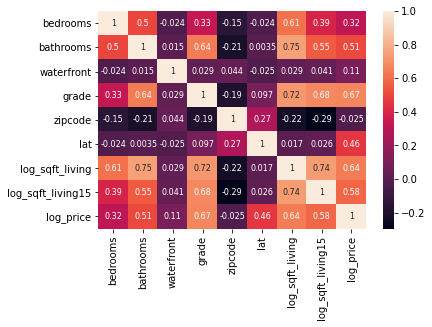

In [395]:
sns.heatmap(m_model_two.corr(), annot = True, annot_kws = {'size': 8})

Drop one of the features that has a correlation of more than 0.75 so that we can reduce multicollinearity.

In [456]:
significant_features = ['bedrooms', 'waterfront', 'grade', 'zipcode', 'lat', 'log_sqft_living','log_sqft_living15']
 
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X = X_train_third_model,
    y = Y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


Current Model
Train score:      0.6144512325805043
Validation score: 0.6177125466530384

Second Model
Train score:      0.6893707227111743
Validation score: 0.7040562579933335

Baseline Model
Train score:      0.46115452851186917
Validation score: 0.4663619573348055


The value of our score has reduced more than what we got in the second model. So this is not a better model

### Build and Evaluate a Final Predictive Model

The best features to predict the house prices are bedrooms, bathrooms, sqft_living, floors, waterfront, sqft_basement.

In [416]:
X1_train.columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'grade', 'zipcode', 'lat',
       'log_sqft_living', 'log_sqft_living15'],
      dtype='object')

In [417]:
#listing the best features
best_features = ['bedrooms', 'bathrooms', 'waterfront', 'grade', 'zipcode', 'lat','log_sqft_living', 'log_sqft_living15']

In [433]:
X1_train_final = X_train[best_features]
X1_test_final = X_test[best_features]

In [435]:
#fitting the final model on the training data and score it on the test data
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X1_train_final, Y1_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X1_test_final, Y1_test)

0.6826107596900926

In [424]:
import statsmodels.api as sm

sm.OLS(Y1_train, sm.add_constant(X1_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     4780.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:44:21   Log-Likelihood:                -1832.0
No. Observations:               16933   AIC:                             3682.
Df Residuals:                   16924   BIC:                             3752.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -86.6516      4.057    -21.357      0.000     -94.605     -78.699
bedrooms             -0.0149      0.003     -5.112      0.000      -0.021      -0.009
bathrooms             0.0021      0.004      0.486      0.627      -0.006       0.011
waterfront            0.6527      0.029     22.143      0.000       0.595       0.710
grade                 0.1372      0.003     46.382      0.000       0.131       0.143
zipcode               0.0003   4.28e-05      6.180      0.000       0.000       0.000
lat                   1.4368      0.016     91.210      0.000       1.406       1.468
log_sqft_living       0.3804      0.011     35.395      0.000       0.359       0.401
log_sqft_living15     0.2060      0.010     20.121      0.000       0.186       0.226
==============================================================================
Omnibus:                      317.884   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.618
Skew:                           0.309   Prob(JB):                     7.32e-77
Kurtosis:                       3.340   Cond. No.                     1.92e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model of this model is 69.3%

#### User-Friendly Metrics

In [436]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y1_test, final_model.predict(X1_test_final), squared=False)

0.2665933710231716

### Interpreting the final model

In [437]:
print(pd.Series(final_model.coef_, index = X1_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

bedrooms            -0.014904
bathrooms            0.002116
waterfront           0.652650
grade                0.137225
zipcode              0.000264
lat                  1.436849
log_sqft_living      0.380395
log_sqft_living15    0.205964
Name: Coefficients, dtype: float64

Intercept: -86.65162976126724


### Checking The Linear Regression Assumptions

#### Investigating for homoscedasticity

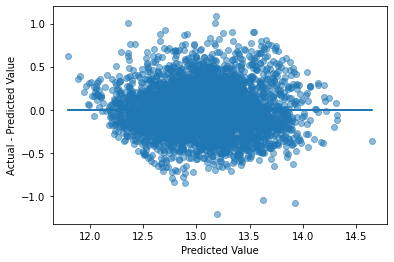

In [438]:
preds = final_model.predict(X1_test_final)
residuals = (Y1_test - preds)
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X1_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Homoscedasticity assumption has been satisfied as most Actual - Predicted values are symmetrical.

#### Checking for Normality

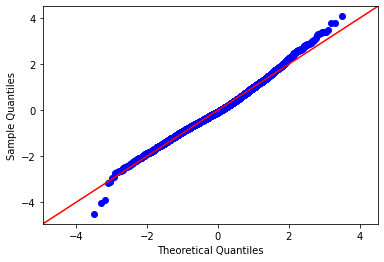

In [439]:
import scipy.stats as stats
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

The normality assumption has been met. The residuals lie in a straight line.

#### Investigating Multicollinearity

In [442]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X1_train_final.values, i) for i in range(X1_train_final.shape[1])]
pd.Series(vif, index=X1_train_final.columns, name="Variance Inflation Factor")

bedrooms                 24.136008
bathrooms                22.034050
waterfront                1.010800
grade                   121.565384
zipcode              129412.260589
lat                  128943.582432
log_sqft_living        1535.666426
log_sqft_living15      1324.764877
Name: Variance Inflation Factor, dtype: float64

###  Conclusions
The features that affect the price of a house in Kings County are bedrooms, bathrooms, waterfront, grade, zipcode, lat, log_sqft_living, log_sqft_living15.
Those who wish to increase the prices of their houses should consider constructing or adding the square footage of their houses.
In so doing, they should endevour using quality materials in order to increase the grade of the houses. More bedrooms also has a positive relationship with the house prices. 
Location, represented by lat and zipcode also affects the price of a house. It seems houses located in certain places demand higher prices than other places.

Although, our model tries to predict prices in the best way possible, more analysis will be need to be done. This is because we still violated some assumptions even after doing away with some features in order to deal with multicollinearity. We removed the outliers from our price column. This means that our model doesn't predict correctly the extreme prices.